# Importacion de librerias necesarias


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sbn
from sklearn import preprocessing

# Preprocesamiento y eleccion de variables

In [2]:
df=pd.read_csv('/content/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Datos estadisticos del DataFrame


In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Matriz de coorelacion

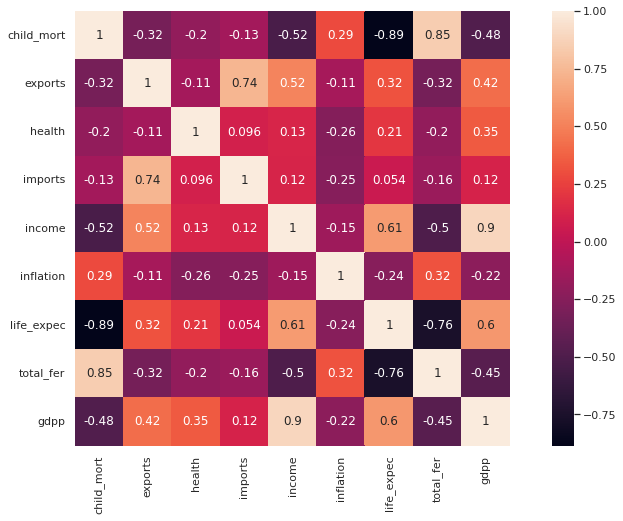

In [ ]:
sbn.set(rc = {'figure.figsize':(15,8)})
sbn.heatmap(df.corr(), square=True, annot=True)

#Cambiamos el genero a valores numericos para poder trabajar con el

In [4]:
df = df.drop(['country'], axis = 1)

In [5]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Escalamiento y detección de outliers

In [6]:
X = df.iloc[:,:].values
X

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [7]:
N = X.shape[0] 
K = 2 

SSE = []
for i in range(0, N):
  X_sin_i = np.delete(X, i, axis=0) 
  kmeans = KMeans(n_clusters=K, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)

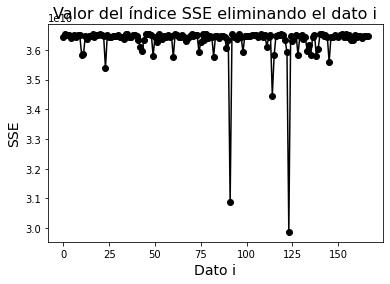

In [8]:
plt.plot(np.arange(0, N), SSE, "ko-")
plt.title("Valor del índice SSE eliminando el dato i", fontsize=16)
plt.xlabel("Dato i", fontsize=14)
plt.ylabel("SSE", fontsize=14)
plt.show()

Detectar y eliminar outliers
Almacenaremos el índice SSE de cada una de las ejecuciones en un vector. Esa
información se puede obtener con la variable inertia_ del modelo

In [9]:
sigma = np.std(SSE) 
mu = np.mean(SSE) 
umbral = 2 
outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) > umbral*sigma:
    outliers.append(i)
print(outliers)

[91, 114, 123]


In [10]:
X_new = np.delete(X, outliers, axis=0)
X_new.shape

(164, 9)

# Optimizacion de la funcion BIC

In [11]:
def BIC(K, grupos, X):
  """
  K: Número de grupos (clusters)
  grupos: Vector que contiene los grupos de los datos
  X: Matriz de datos
  """
  N = X.shape[0] # Número de datos
  P = X.shape[1] # Número de variables
  xi = np.zeros((1,K)) # Vector xi

  # Calculamos el sumario de xi en la fórmula
  for k in range(0, K):
    suma = 0
    for j in range(0, P):
      sigma = np.square(np.std(X[:, j]))
      sigma_j = np.square(np.std(X[grupos==k, j]))
      suma += 0.5*np.log(sigma + sigma_j)

    n_k = sum(grupos==k) # Número de elementos en el grupo k
    xi[0, k] = -n_k*suma

  bic = -2*np.sum(xi) + 2*K*P*np.log(N)
  return bic

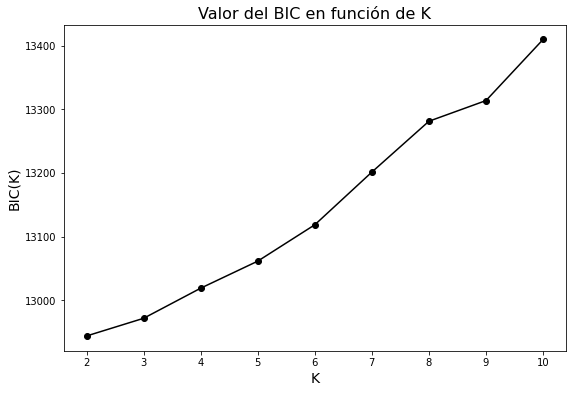

In [12]:
## Calculo del BIC
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Kmax = 10
BIC_array = []
for k in range(2, Kmax+1):
  kmeans = KMeans(n_clusters=k, n_init=15, random_state=100)
  grupos = kmeans.fit_predict(X)
  BIC_array.append(BIC(k, grupos, X))

# Dibujamos el BIC obtenido para cada valor de k
plt.figure(figsize=(9, 6))
plt.plot(np.arange(2, Kmax+1), BIC_array, "ko-")
plt.title("Valor del BIC en función de K", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("BIC(K)", fontsize=14)
plt.show()

# Ejecución de análisis cluster con un valor de k concreto (número de grupos), por ejemplo 4, y determinar el número de réplicas (n_init) del algoritmo que conduce a que la repetición de dicho algoritmo genere la misma solución.

In [14]:
kmeans = KMeans(n_clusters=4, n_init=30, random_state=100)
pred = kmeans.fit_predict(X_new)
centroides = kmeans.cluster_centers_

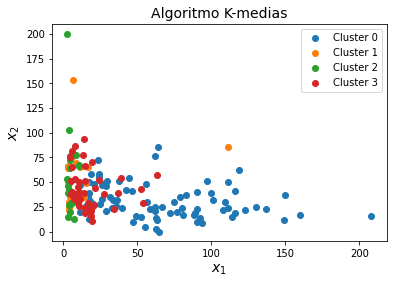

In [15]:
for k in range(0, 4):
  plt.scatter(X_new[pred==k, 0], X_new[pred==k, 1], label="Cluster {}".format(k)) 

plt.title("Algoritmo K-medias", fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()

#Mostrar para el análisis anterior una tabla con los siguientes datos: número de grupo, cantidad de observaciones de ese grupo y el centroide que representa a ese grupo(valor de cada variable)

In [16]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [17]:
centroides

array([[6.30642857e+01, 3.10392738e+01, 6.14821429e+00, 4.59448321e+01,
        4.32670238e+03, 9.84197619e+00, 6.49273810e+01, 3.89309524e+00,
        1.94778571e+03],
       [1.28833333e+01, 5.54666667e+01, 7.44500000e+00, 5.07833333e+01,
        3.21833333e+04, 5.18388889e+00, 7.76055556e+01, 2.05111111e+00,
        2.39166667e+04],
       [5.09500000e+00, 5.70450000e+01, 9.36600000e+00, 4.82100000e+01,
        4.81400000e+04, 2.89060000e+00, 8.03950000e+01, 1.79350000e+00,
        4.66000000e+04],
       [1.77357143e+01, 4.38476190e+01, 6.69952381e+00, 4.52071429e+01,
        1.61576190e+04, 7.26590476e+00, 7.33880952e+01, 2.06785714e+00,
        8.94761905e+03]])

In [31]:
tabla = pd.DataFrame()
grupos = np.bincount(pred)

for k in range(4):
  tabla.loc[k, 'Grupos'] = k
  tabla.loc[k, "Numero Observaciones"] = grupos[k]
  tabla.loc[k,'child_mort'] = centroides[k,0]
  tabla.loc[k,'exports'] = centroides[k,1]
  tabla.loc[k,'health'] = centroides[k,2]
  tabla.loc[k,'imports '] = centroides[k,3]
  tabla.loc[k,'income '] = centroides[k,4]
  tabla.loc[k,'inflation '] = centroides[k,5]
  tabla.loc[k,'life_expec '] = centroides[k,6]
  tabla.loc[k,'total_fer '] = centroides[k,7]
  tabla.loc[k,'gdpp '] = centroides[k,8]  
tabla


,Grupos,Numero Observaciones,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.0,84.0,63.064286,31.039274,6.148214,45.944832,4326.702381,9.841976,64.927381,3.893095,1947.785714
1,1.0,18.0,12.883333,55.466667,7.445000,50.783333,32183.333333,5.183889,77.605556,2.051111,23916.666667
2,2.0,20.0,5.095000,57.045000,9.366000,48.210000,48140.000000,2.890600,80.395000,1.793500,46600.000000
3,3.0,42.0,17.735714,43.847619,6.699524,45.207143,16157.619048,7.265905,73.388095,2.067857,8947.619048


In [29]:
centroides[3,4]

16157.619047619048